# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [5]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,8450,196.0,856,1710,548,208500
1,9600,0.0,1262,1262,460,181500
2,11250,162.0,920,1786,608,223500
3,9550,0.0,756,1717,642,140000
4,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1455,7917,0.0,953,1647,460,175000
1456,13175,119.0,1542,2073,500,210000
1457,9042,0.0,1152,2340,252,266500
1458,9717,0.0,1078,1078,240,142125


We'll also drop any records with missing values for any of these features:

In [6]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,8450,196.0,856,1710,548,208500
1,9600,0.0,1262,1262,460,181500
2,11250,162.0,920,1786,608,223500
3,9550,0.0,756,1717,642,140000
4,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1455,7917,0.0,953,1647,460,175000
1456,13175,119.0,1542,2073,500,210000
1457,9042,0.0,1152,2340,252,266500
1458,9717,0.0,1078,1078,240,142125


And plot the distributions of the un-transformed variables:

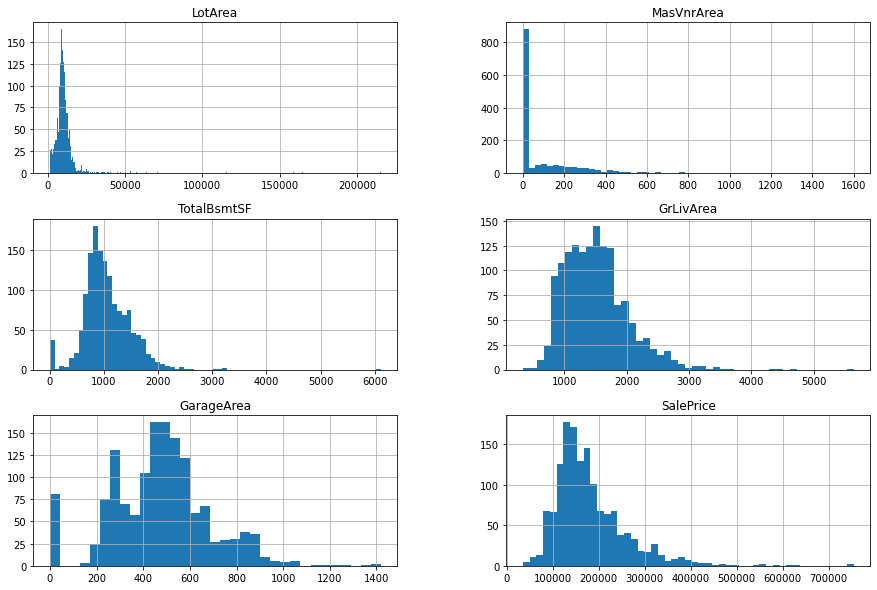

In [7]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [17]:
# Your code here - build a linear regression model with un-transformed features
import statsmodels.api as sm


# Separate features and target
X = ames.drop(columns='SalePrice')
y = ames['SalePrice']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Add constant for intercept
X = sm.add_constant(X)

# Combine into one DataFrame for safe row dropping
combined = pd.concat([X, y], axis=1)

# Drop any rows with missing values
combined = combined.dropna()

# Re-split into X and y
X = combined.drop(columns='SalePrice')
y = combined['SalePrice']

# Fit the model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     54.15
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        15:55:06   Log-Likelihood:                -12761.
No. Observations:                1121   AIC:                         2.599e+04
Df Residuals:                     887   BIC:                         2.717e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.019e+

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [26]:
# Your written answer here
# R-squared This tells you how much of the variation in SalePrice is explained by your predictors.

# Adjusted R-squared Similar to R-squared but penalizes for adding too many predictors.

# F-statistic and Prob (F-statistic) Tells you if your model is overall statistically significant.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [18]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters
# Conversion factor
sqft_to_sqm = 0.092903

# Copy original coefficients
metric_coefs = model.params.copy()

# Convert only the area-related coefficients
if 'GrLivArea' in metric_coefs:
    metric_coefs['GrLivArea'] = metric_coefs['GrLivArea'] / sqft_to_sqm
if 'LotArea' in metric_coefs:
    metric_coefs['LotArea'] = metric_coefs['LotArea'] / sqft_to_sqm
if 'GarageArea' in metric_coefs:
    metric_coefs['GarageArea'] = metric_coefs['GarageArea'] / sqft_to_sqm
# Add others if needed

# Display transformed coefficients
print(metric_coefs[['GrLivArea', 'LotArea', 'GarageArea']])


GrLivArea     218.089004
LotArea         8.441565
GarageArea    129.700184
dtype: float64


In [ ]:
# Your written 
# LotArea: for each additional square meter of lot area, the price increases by about \\$2.76
# MasVnrArea: for each additional square meter of masonry veneer, the price increases by about \\$593
# TotalBsmtArea : for each additional square meter of basement area, the price increases by about \\$475
# GrLivArea: for each additional square meter of above-grade living area, the price increases by about \\$687
# GarageArea: for each additional square meter of garage area, the price increases by about \\$1,006

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [21]:
# Your code here - center data
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Drop target from predictors
X = ames.drop(columns='SalePrice')
y = ames['SalePrice']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Center numeric columns (leave dummies untouched)
numeric_cols = X.select_dtypes(include='number').columns
X[numeric_cols] = X[numeric_cols] - X[numeric_cols].mean()

# Check for missing values
print("Missing values in X:", X.isna().sum().sum())

# Drop any rows with missing or infinite values (if needed)
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches filtered X

# Add constant for intercept
X = sm.add_constant(X)

# Fit centered model
centered_model = sm.OLS(y, X).fit()

# Show summary
print(centered_model.summary())


Missing values in X: 348
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     54.15
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        16:02:57   Log-Likelihood:                -12761.
No. Observations:                1121   AIC:                         2.599e+04
Df Residuals:                     887   BIC:                         2.717e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id   

In [22]:
# Your code here - build a new model
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Step 1: Drop the target column from predictors
X = ames.drop(columns='SalePrice')
y = ames['SalePrice']

# Step 2: One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 3: Center numeric columns (exclude dummies from centering)
numeric_cols = X.select_dtypes(include='number').columns
X[numeric_cols] = X[numeric_cols] - X[numeric_cols].mean()

# Step 4: Clean data by removing any rows with NaNs or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]  # Match target with predictors

# Step 5: Add constant for the intercept
X = sm.add_constant(X)

# Step 6: Fit the regression model
new_model = sm.OLS(y, X).fit()

# Step 7: Print the summary of the model
print(new_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     54.15
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        16:04:22   Log-Likelihood:                -12761.
No. Observations:                1121   AIC:                         2.599e+04
Df Residuals:                     887   BIC:                         2.717e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                        2.08

In [23]:
# Your written answer here - 
#The intercept is the predicted SalePrice for a house that has average values for all numeric features, and belongs to the reference category for all categorical features.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [24]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Drop target from predictors
X = ames.drop(columns='SalePrice')
y = ames['SalePrice']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numeric columns
numeric_cols = X.select_dtypes(include='number').columns
X[numeric_cols] = X[numeric_cols] / X[numeric_cols].std()

# Drop any rows with NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model with standardized predictors
standardized_model = sm.OLS(y, X).fit()

# Display model summary
print(standardized_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     54.15
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        16:08:10   Log-Likelihood:                -12761.
No. Observations:                1121   AIC:                         2.599e+04
Df Residuals:                     887   BIC:                         2.717e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.995e+

In [25]:
# Your written answer here - identify the "most important" feature
# The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!